# 0. Préambule et configurations
Dans cette section, nous importons les bibliothèques nécessaires et notre jeu de données, qui est basé sur les informations du site Anilist (2025).

## Bibliothèques utilisées
| Bibliothèque | Utilisation |
|--------------|-------------|
| Pandas | Manipulation et analyse de données |
| Matplotlib.pyplot | Visualisation des données |
| Seaborn | Visualisation des données |
| NumPy | Création et gestion de valeurs nulles |

## Description des colonnes du jeu de données

Ce jeu de données a été nettoyé au préalable, en retirant les catégories inutiles à notre analyse, ainsi qu'en raison de sa taille conséquente. Nous n'expliquons ici que les catégories que nous utiliserons.

| Colonne | Description |
|---------|-------------|
| anime_id | Identifiant unique de l'anime |
| title | Titre original de l'anime |
| english_title | Titre de l'anime en anglais |
| japanese_title | Titre de l'anime en japonais |
| user_preferred_title | Titre préféré par les utilisateurs pour cet anime |
| type | Format de l'anime (ex. TV, Film, OAV) |
| episodes | Nombre total d'épisodes |
| duration | Durée moyenne d’un épisode ou du film |
| status | Statut actuel (terminé ou en cours de diffusion) |
| source | Origine de l'anime (manga, light novel, création originale, etc.) |
| season | Saison de première diffusion |
| season_year | Année de première diffusion |
| studios | Studio de production |
| genres | Genres associés à l'anime |
| score | Note moyenne attribuée par les utilisateurs |
| mean_score | Score moyen pondéré |
| scored_by | Nombre d'utilisateurs ayant attribué une note à l'anime |
| rank | Classement global basé sur le score |
| popularity | Classement basé sur le nombre de membres |
| popularity_rank | Classement de popularité de l'anime |
| members | Nombre d’utilisateurs ayant ajouté l’anime à leur profil |
| favorites | Nombre d’utilisateurs ayant mis l’anime en favori |
| watching | Nombre de membres actuellement en train de regarder cet anime |
| completed | Nombre de membres ayant terminé cet anime |
| on_hold | Nombre de membres ayant mis cet anime en pause |
| dropped | Nombre de membres ayant abandonné cet anime |
| plan_to_watch | Nombre de membres prévoyant de regarder cet anime |
| country_of_origin | Pays d'origine de l'anime |
| is_adult | Indique si l'anime est destiné à un public adulte |


Crédits :
https://github.com/LeoRigasaki/Anime-dataset

**Remarque :** Anilist est un site beaucoup plus récent que MyAnimeList. Par conséquence, les statistiques de popularité sont très différentes entre les deux sites.


In [438]:
# Import de nos librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

# Style global
sns.set_theme(style="whitegrid", context="notebook")
path = "./data/anilist_seasonal_20250720.csv"


# 1. Import, et premières impressions

In [439]:
# On importe notre jeu de données
df = pd.read_csv(path)

In [440]:
print("Dimensions :", df.shape)

Dimensions : (13688, 30)


In [441]:
print("Les colonnes de notre jeu de données :\n", df.columns)

Les colonnes de notre jeu de données :
 Index(['anime_id', 'title', 'english_title', 'japanese_title',
       'user_preferred_title', 'type', 'episodes', 'duration', 'status',
       'source', 'season', 'season_year', 'studios', 'genres', 'tags', 'score',
       'mean_score', 'scored_by', 'rank', 'popularity', 'popularity_rank',
       'members', 'favorites', 'watching', 'completed', 'on_hold', 'dropped',
       'plan_to_watch', 'country_of_origin', 'is_adult'],
      dtype='object')


In [442]:
# On jette un œil au nombre unique de valeurs de chaque ligne
df.nunique()

anime_id                13688
title                   13670
english_title            7570
japanese_title          13276
user_preferred_title    13670
type                        8
episodes                  190
duration                  154
status                      5
source                      7
season                    225
season_year                57
studios                  6821
genres                   1378
tags                    11023
score                      73
mean_score                 81
scored_by                   2
rank                      501
popularity               8044
popularity_rank           502
members                  8044
favorites                1775
watching                 2826
completed                6493
on_hold                  2067
dropped                  2442
plan_to_watch            5834
country_of_origin           4
is_adult                    2
dtype: int64

In [443]:
# On affiche les cinq premières lignes
df.head()

,anime_id,title,english_title,japanese_title,user_preferred_title,type,episodes,duration,status,source,...,popularity_rank,members,favorites,watching,completed,on_hold,dropped,plan_to_watch,country_of_origin,is_adult
0,185879,"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokub...",NaN,“いそっぷ”のおはなしより 牛とかえる、よくばった犬,"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokub...",MOVIE,1.0,12.0,FINISHED,NaN,...,0,34,0,0,9,1,8,16,JP,False
1,2402,Ashita no Joe,Tomorrow's Joe,あしたのジョー,Ashita no Joe,TV,79.0,25.0,FINISHED,MANGA,...,0,32485,1082,2309,7914,1740,895,19627,JP,False
2,3858,Konchuu Monogatari Minashigo Hutch,The Adventures of Hutch the Honeybee,昆虫物語みなしごハッチ,Konchuu Monogatari Minashigo Hutch,TV,91.0,24.0,FINISHED,ORIGINAL,...,0,908,19,42,510,39,97,220,JP,False
3,2316,Akakichi no Eleven,NaN,赤き血のイレブン,Akakichi no Eleven,TV,52.0,25.0,FINISHED,MANGA,...,0,673,6,46,170,26,66,365,JP,False
4,12789,Yasashii Lion,NaN,やさしいライオン,Yasashii Lion,MOVIE,1.0,27.0,FINISHED,OTHER,...,0,628,3,26,380,9,26,187,JP,False


In [444]:
# On affiche les cinq dernières lignes
df.tail()

,anime_id,title,english_title,japanese_title,user_preferred_title,type,episodes,duration,status,source,...,popularity_rank,members,favorites,watching,completed,on_hold,dropped,plan_to_watch,country_of_origin,is_adult
13683,186736,Kagaku×Bouken Survival! 2nd Season,NaN,科学×冒険サバイバル！ 第2シリーズ,Kagaku×Bouken Survival! 2nd Season,TV,NaN,NaN,NOT_YET_RELEASED,MANGA,...,0,44,0,1,2,2,7,32,JP,False
13684,195360,Honey Blonde 2,NaN,ハニーブロンド2,Honey Blonde 2,OVA,NaN,20.0,NOT_YET_RELEASED,MANGA,...,0,42,1,3,0,6,1,32,JP,True
13685,195383,MUZIK TIGER In the Forest 2,NaN,MUZIK TIGER In the Forest 第2期,MUZIK TIGER In the Forest 2,TV_SHORT,NaN,NaN,NOT_YET_RELEASED,OTHER,...,0,32,0,0,1,1,7,23,JP,False
13686,195173,SHIBUYA♡HACHI Part 4,NaN,SHIBUYA♡HACHI 第4クール,SHIBUYA♡HACHI Part 4,TV_SHORT,NaN,NaN,NOT_YET_RELEASED,ORIGINAL,...,0,24,0,0,1,1,7,15,JP,False
13687,196230,Monster Strike: Deadverse Reloaded,NaN,モンスターストライク デッドバースリローデッド,Monster Strike: Deadverse Reloaded,TV,NaN,NaN,NOT_YET_RELEASED,VIDEO_GAME,...,0,0,0,0,0,0,0,0,JP,False


# 2. Nettoyage du jeu de données

Cette section est consacrée au **nettoyage et à la préparation** de notre jeu de données.
Après analyse et recherche, les étapes suivantes ont été réalisées :


In [445]:
# TRI DES DONNEES
# On crée une copie de notre jeu de données, copie propre qu'on utilisera
df_clean = df.copy()

cols = ["episodes", "season_year"]
for c in cols:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c], errors="coerce")

# On supprime les doublons
df_clean = df_clean.drop_duplicates()

cols = ["genres", "tags", "studios"]
for c in cols:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].str.split("[,;.]")

# On ajoute une colonne durée totale
df_clean["total_duration"] = df_clean["duration"] * df_clean["episodes"]

In [446]:

def split_season(value):
    """
    Fonction qui sépare la saison de l'année, afin d'avoir une colonne dédiée aux saisons, et non à l'année de la saison.
    :param value: La valeur de la colonne (chaîne de caractères ou NaN)
    :return: La saison si elle est disponible, sinon np.nan.
    """
    if pd.isna(value):
        return np.nan
    try:
        season, year = value.split()
        return season
    except Exception:
        return np.nan



df_clean['season'] = df_clean['season'].apply(split_season)


# 3. Analyse exploratoire univariée

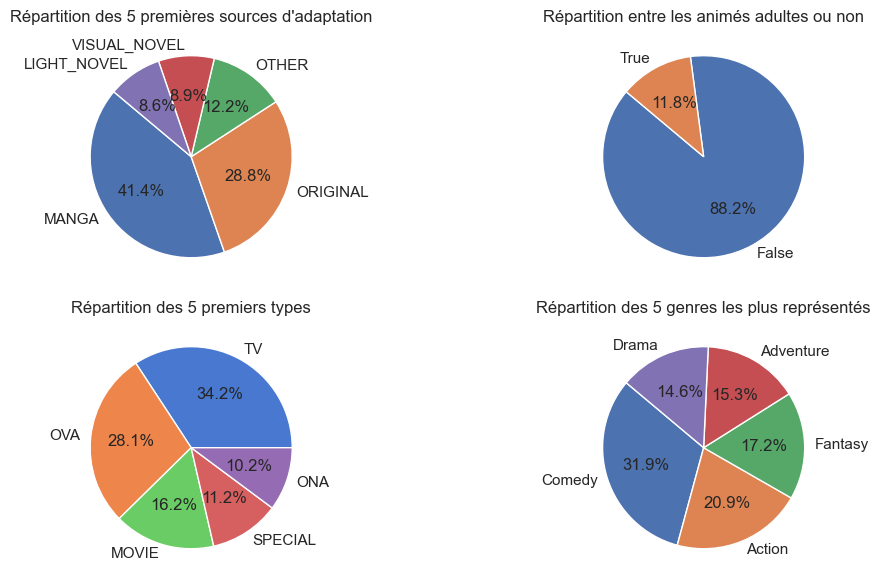

In [447]:
from collections import Counter

fig, axis = plt.subplots(2, 2, figsize=(12, 6))
ax1 = axis[0, 0]
ax2 = axis[0, 1]
ax3 = axis[1, 0]
ax4 = axis[1, 1]

# Répartition des sources d'adaptation
counts = df_clean["source"].value_counts().head(5)
ax1.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
ax1.set_title("Répartition des 5 premières sources d'adaptation")

# Extraction des données de fréquences
counts_adult = df_clean["is_adult"].value_counts()


ax2.pie(
    counts_adult.values,
    labels=counts_adult.index,
    autopct='%1.1f%%',
    startangle=140
)
ax2.set_title("Répartition entre les animés adultes ou non")


type_counts = df_clean["type"].value_counts().head(5)
ax3.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("muted")
)
ax3.set_title("Répartition des 5 premiers types")


df_exploded = df_clean.explode('genres')

top_genres = df_exploded['genres'].value_counts().head(5)

ax4.pie(
    top_genres.values,
    labels=top_genres.index,
    autopct='%1.1f%%',
    startangle=140,
)

ax4.set_title("Répartition des 5 genres les plus représentés")

plt.tight_layout()
plt.show()

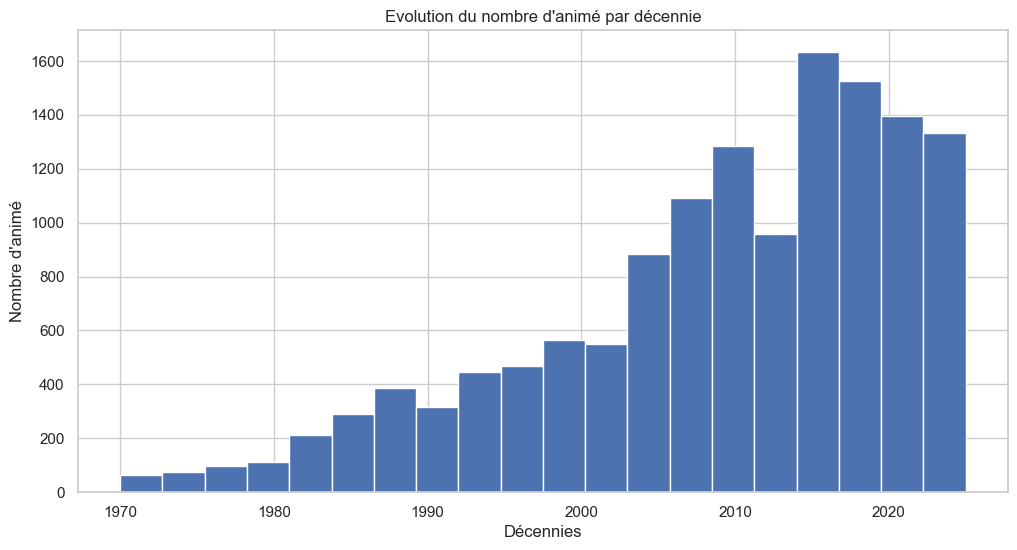

In [448]:
df_year = df_clean["season_year"]

fig = plt.figure(figsize=(12,6))
plt.hist(x=df_year, bins=20)
plt.xlabel("Décennies")
plt.ylabel("Nombre d'animé")
plt.title("Evolution du nombre d'animé par décennie")

plt.show()

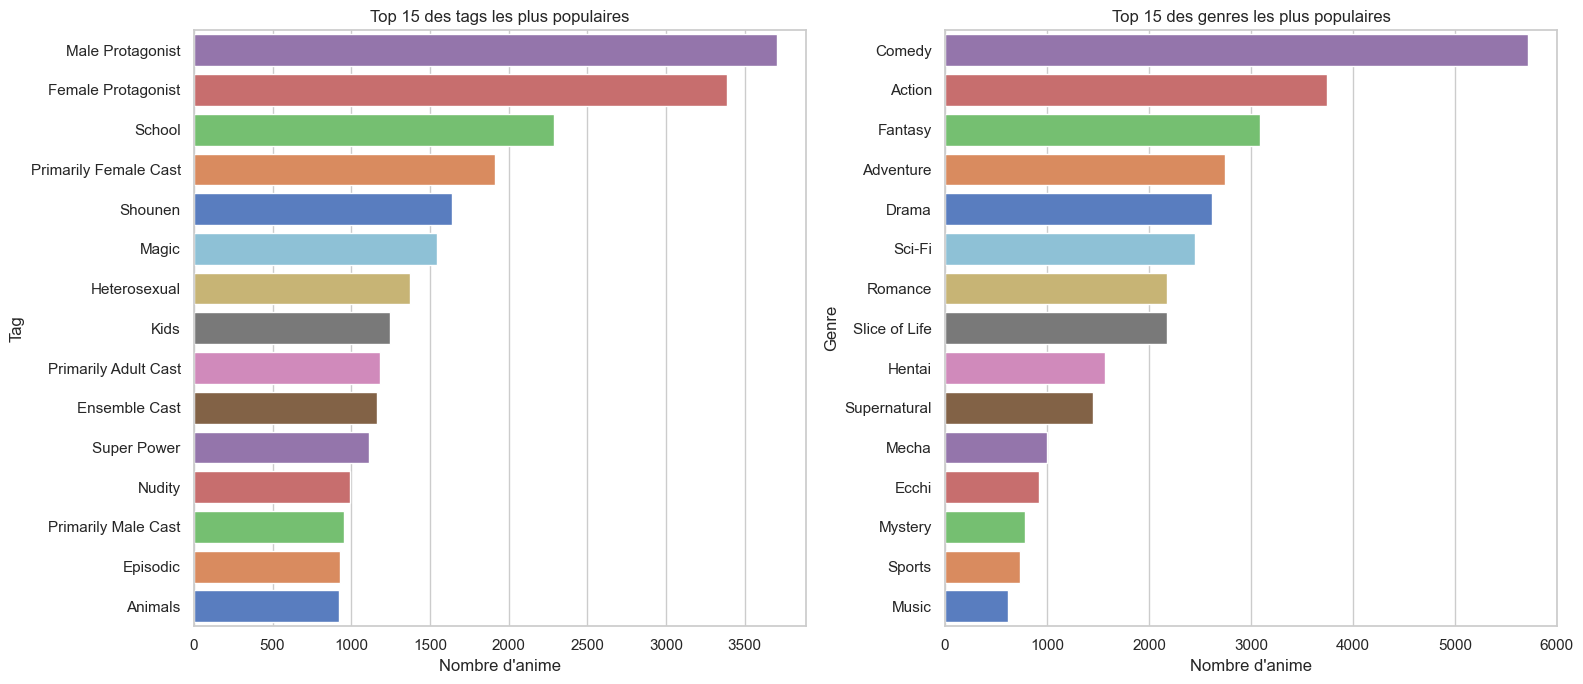

In [449]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))


df_exploded = df_clean.explode('tags')
top_tags = df_exploded["tags"].value_counts().head(15)
sns.barplot(
    x=top_tags.values,
    ax=ax1,
    y=top_tags.index,
    hue=top_tags.values,
    legend=False,
    palette="muted"
)
ax1.set_title("Top 15 des tags les plus populaires")
ax1.set_xlabel("Nombre d'anime")
ax1.set_ylabel("Tag")

df_exploded = df_clean.explode('genres')
top_genres = df_exploded["genres"].value_counts().head(15)
sns.barplot(
    x=top_genres.values,
    ax=ax2,
    y=top_genres.index,
    hue=top_genres.values,
    legend=False,
    palette="muted")
ax2.set_title("Top 15 des genres les plus populaires")
ax2.set_xlabel("Nombre d'anime")
ax2.set_ylabel("Genre")

plt.tight_layout()
plt.show()

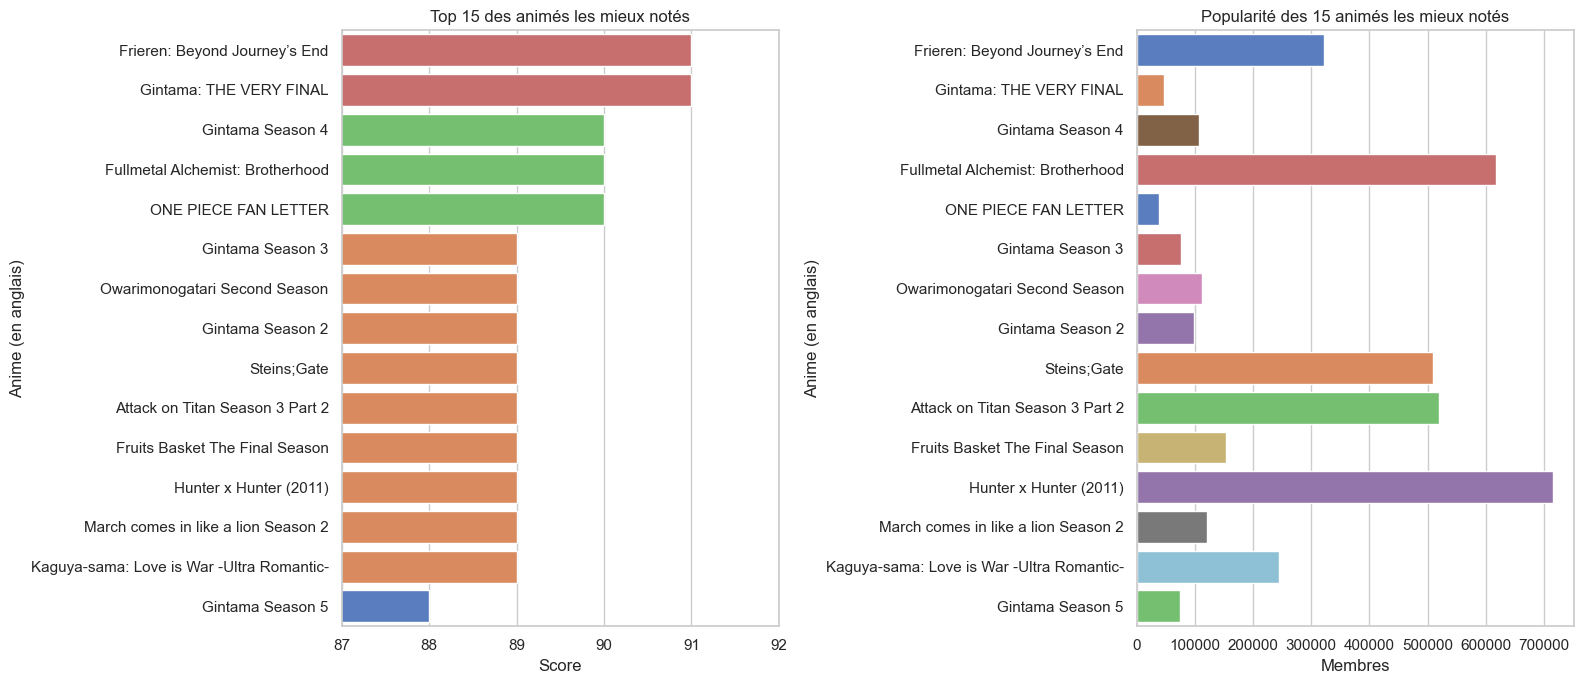

In [450]:
# --- Données : top 15 par score ---
top15_score = df_anime.sort_values(by="score", ascending=False).head(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

sns.barplot(
    x="score",
    y="english_title",
    data=top15_score,
    hue="score",
    palette="muted",
    dodge=False,
    ax=ax1,
    legend=False)
ax1.set_xlabel("Score")
ax1.set_ylabel("Anime (en anglais)")
ax1.set_xlim(87, 92)
ax1.set_title("Top 15 des animés les mieux notés")

sns.barplot(
    x="popularity",
    y="english_title",
    data=top15_score,
    hue="popularity",
    palette="muted",
    dodge=False,
    ax=ax2,
    legend=False)
ax2.set_xlabel("Membres")
ax2.set_ylabel("Anime (en anglais)")
ax2.set_title("Popularité des 15 animés les mieux notés")

plt.tight_layout()
plt.show()


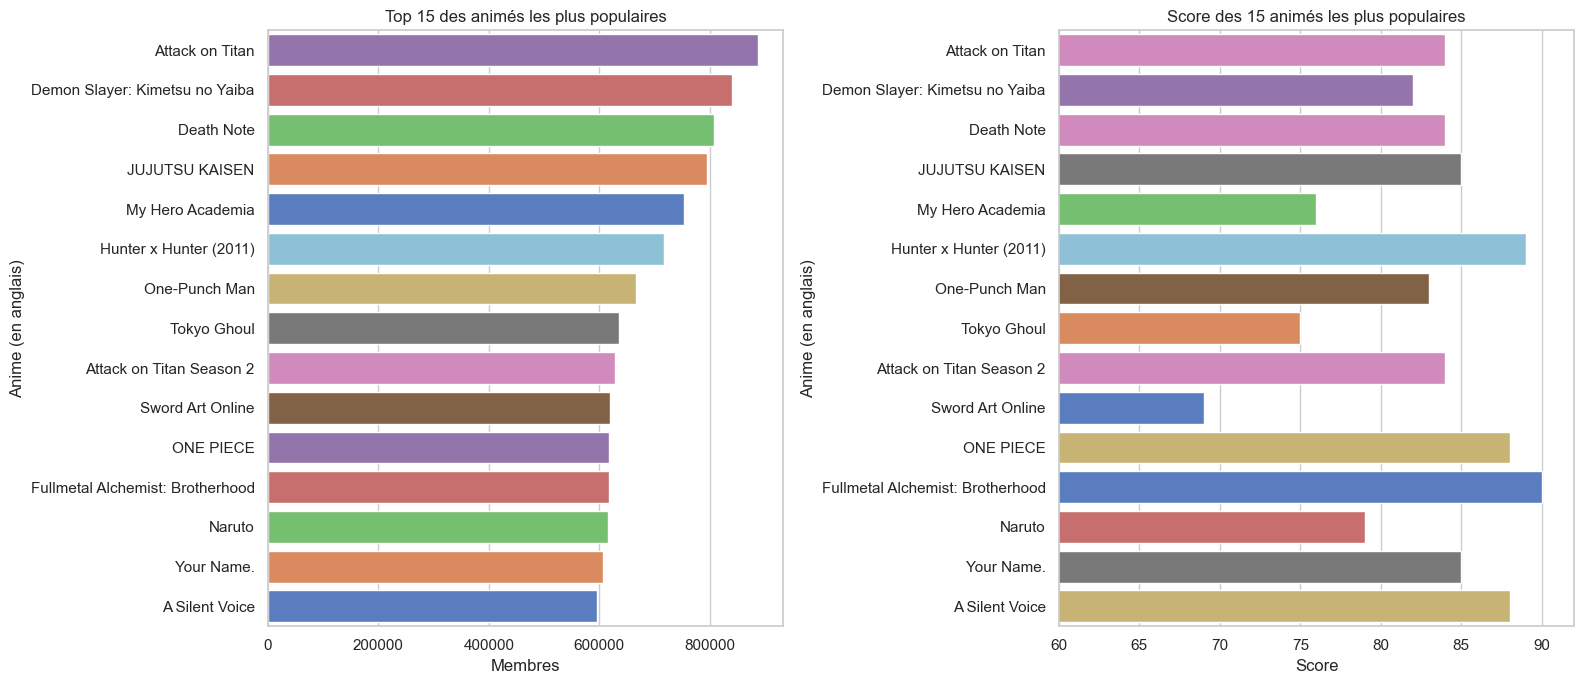

In [451]:
# --- Données : top 15 par popularité ---
top15_pop = df_clean.sort_values(by="popularity", ascending=False).head(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

sns.barplot(
    x="popularity",
    y="english_title",
    data=top15_pop,
    hue="popularity",
    palette="muted",
    dodge=False,
    legend=False,
    ax=ax1
)
ax1.set_xlabel("Membres")
ax1.set_ylabel("Anime (en anglais)")
ax1.set_title("Top 15 des animés les plus populaires")

sns.barplot(
    x="score",
    y="english_title",
    data=top15_pop,
    hue="score",
    palette="muted",
    dodge=False,
    legend=False,
    ax=ax2
)
ax2.set_xlabel("Score")
ax2.set_ylabel("Anime (en anglais)")
ax2.set_title("Score des 15 animés les plus populaires")
ax2.set_xlim(60, 92)

plt.tight_layout()
plt.show()

## Comparaison popularité vs score

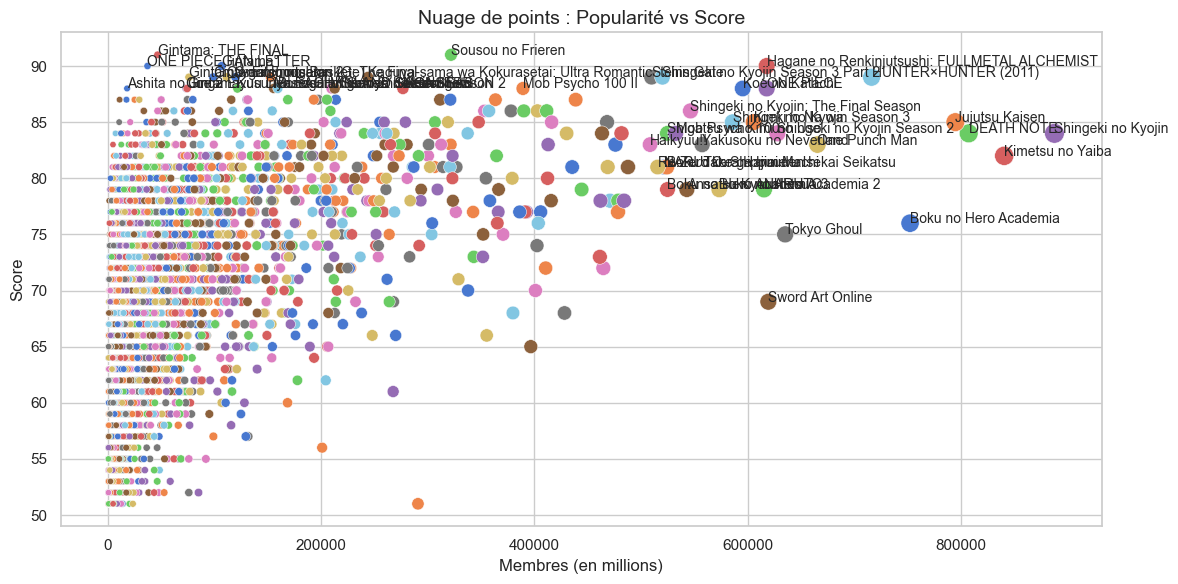

In [452]:
df_anime_limite = df_clean[df_clean["score"] > 50]
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_anime_limite,
    x="popularity",
    y="score",
    size="popularity",
    sizes=(20, 200),
    hue="popularity",
    palette="muted",
    legend=False
)

# Ajouter les labels uniquement pour certains points
texts = []
for i in range(len(df_anime_limite)):
    if (df_anime_limite["popularity"].iloc[i] > 500000) or (df_anime_limite["score"].iloc[i]>87):
        texts.append(
            plt.text(
                x=df_anime_limite["popularity"].iloc[i],
                y=df_anime_limite["score"].iloc[i],
                s=df_anime_limite["title"].iloc[i],
                fontsize=10
            )
        )


# Mise en forme
plt.title("Nuage de points : Popularité vs Score", fontsize=14)
plt.xlabel("Membres (en millions)", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.tight_layout()
plt.show()

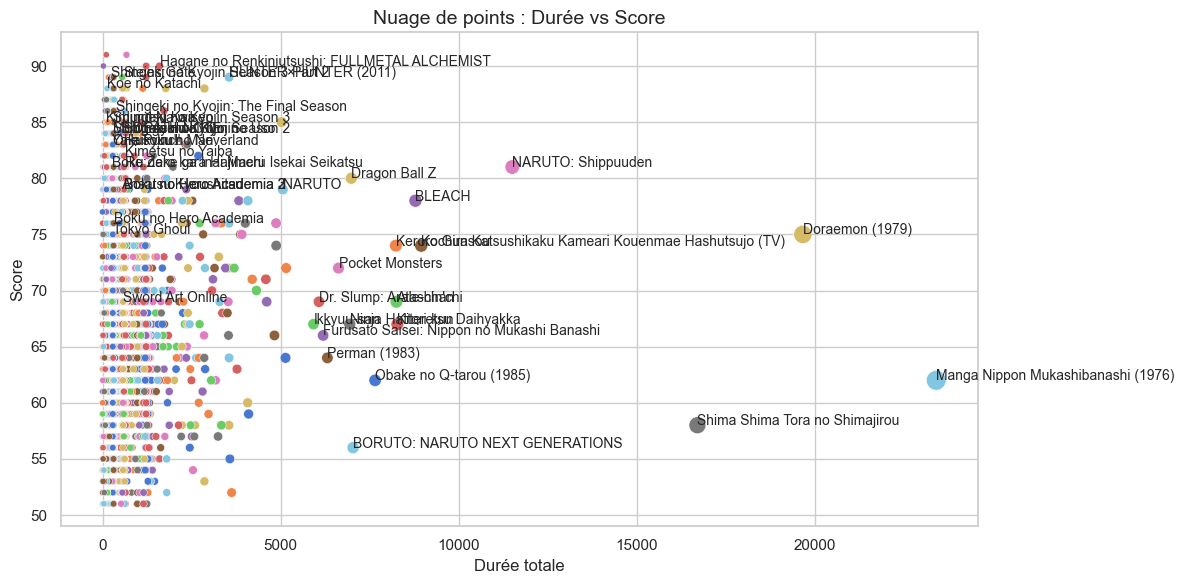

In [459]:
df_anime = df_clean[df_clean["score"] > 50]
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_anime,
    x="total_duration",
    y="score",
    size="total_duration",
    sizes=(20, 200),
    hue="total_duration",
    palette="muted",
    legend=False
)

# Ajouter les labels uniquement pour certains points
texts = []
for i in range(len(df_anime)):
    if (df_anime["popularity"].iloc[i] > 500000) or (df_anime["total_duration"].iloc[i]>5500):
        texts.append(
            plt.text(
                x=df_anime["total_duration"].iloc[i],
                y=df_anime["score"].iloc[i],
                s=df_anime["title"].iloc[i],
                fontsize=10
            )
        )


# Mise en forme
plt.title("Nuage de points : Durée vs Score", fontsize=14)
plt.xlabel("Durée totale", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.tight_layout()
plt.show()

## Utilisation et découverte de l'IA et scikit-learn

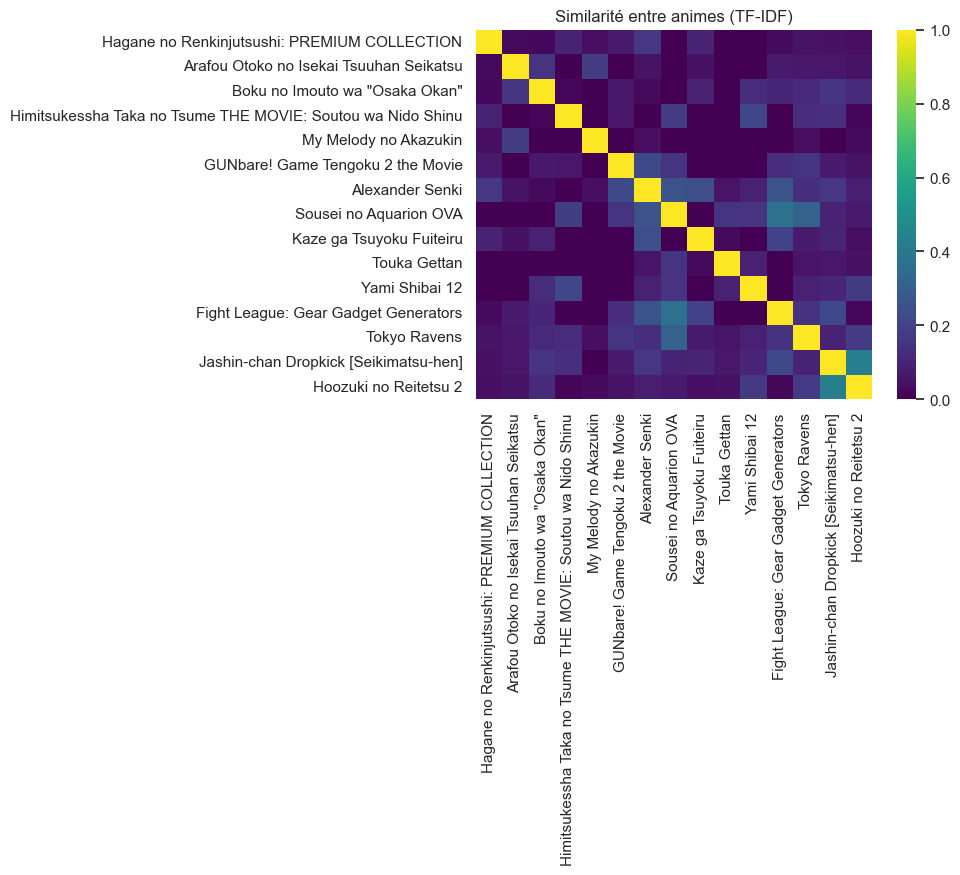

In [454]:
sample_indices = df_clean.sample(15).index

sns.heatmap(cosine_sim[np.ix_(sample_indices, sample_indices)],
            xticklabels=df_clean["title"].iloc[sample_indices],
            yticklabels=df_clean["title"].iloc[sample_indices],
            cmap="viridis")
plt.title("Similarité entre animes (TF-IDF)")
plt.show()

